In [23]:
# Import Libraries

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from surprise import Dataset, Reader, SVD, KNNBasic, KNNWithMeans, NMF, BaselineOnly, accuracy
from datetime import datetime



In [24]:
#load datasets
wine_df = pd.read_csv('wine_data.csv')
chicks_df= pd.read_csv('chickwts_data.csv')
arrests_df = pd.read_csv('arrests_data.csv')

Wine Dataset Analysis


In [25]:
#Wine Basic Info
print(wine_df.head())
print(wine_df.info())
print(wine_df.describe())
print(wine_df.isnull().sum())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [26]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [27]:
# Define X and y
X = wine_df.drop('target', axis=1)
y = wine_df['target']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
#Scale the Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

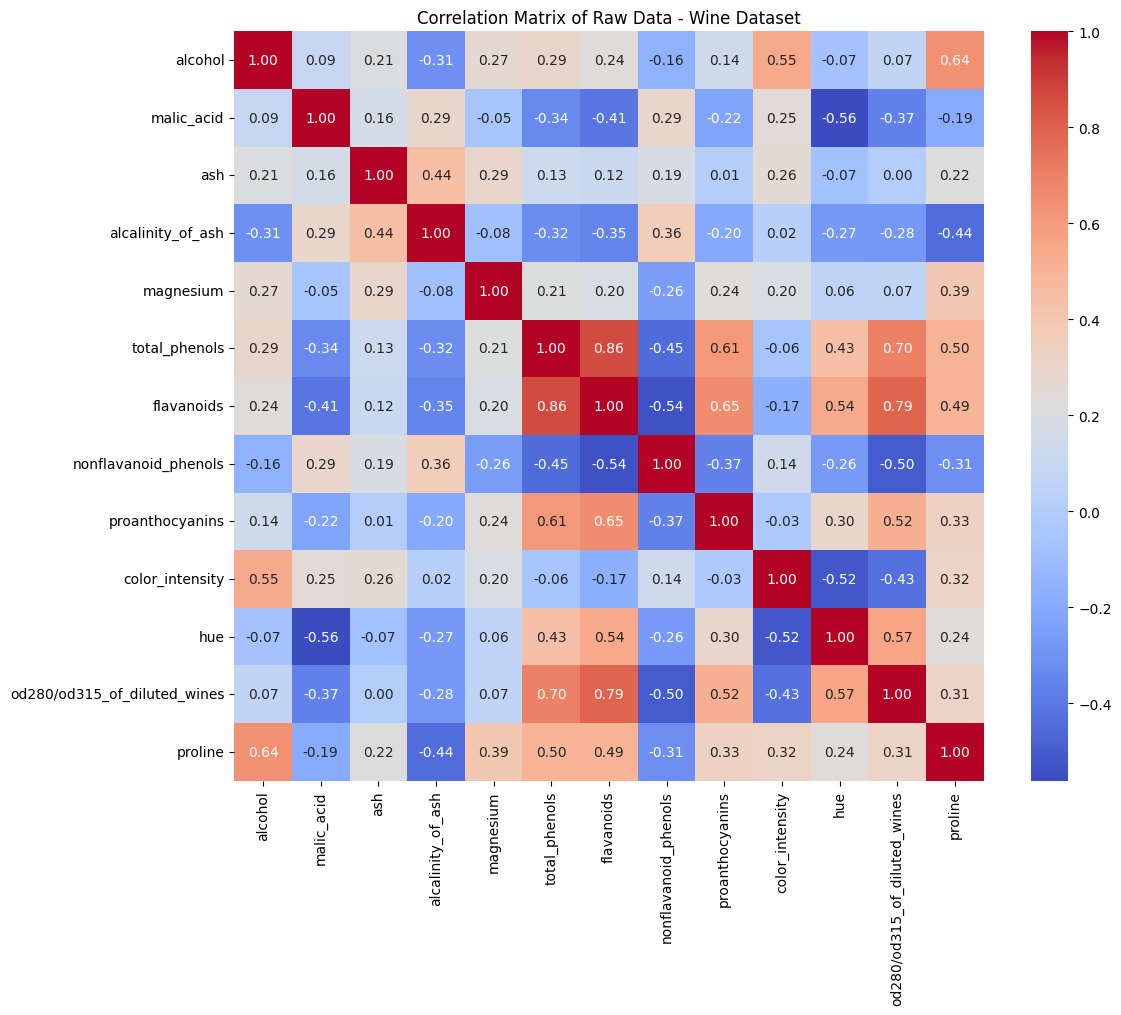

In [29]:
#AI prompt: can I please have the code for a correlation matrix? I can fill in and ask questions if needed.
plt.figure(figsize=(12, 10))
sns.heatmap(wine_df.drop('target', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Raw Data - Wine Dataset')
plt.tight_layout()
plt.show()


In [30]:
#PCA
pca = PCA()
pca.fit(X_train_scaled)

# Explained Variance and Cumulative Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
eigenvalues = pca.explained_variance_

In [60]:
eigenvalues = pca.explained_variance_ #had to reinput so cell would run

target_variance = 0.95
n_components_variance = np.argmax(cumulative_variance >= target_variance) +1 
# Kaiser Criterion (eigenvalue > 1.0)
n_components_kaiser = sum(eigenvalues > 1.0)

# Choosing Optimal Components
n_components_optimal = n_components_variance

print(f"Number of components for 95% variance: {n_components_variance}")
print(f"Number of components by Kaiser criterion: {n_components_kaiser}")
print(f"Chosen number of components: {n_components_optimal}")

Number of components for 95% variance: 10
Number of components by Kaiser criterion: 1
Chosen number of components: 10


In [32]:
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f} of variance explained")
print("\nCumulative explained variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"First {i+1} components: {cum_var:.4f}")

#10 is optimal

Principal Component 1: 0.3966 of variance explained
Principal Component 2: 0.2059 of variance explained
Principal Component 3: 0.0922 of variance explained
Principal Component 4: 0.0706 of variance explained
Principal Component 5: 0.0545 of variance explained
Principal Component 6: 0.0412 of variance explained
Principal Component 7: 0.0361 of variance explained
Principal Component 8: 0.0257 of variance explained
Principal Component 9: 0.0213 of variance explained
Principal Component 10: 0.0204 of variance explained
Principal Component 11: 0.0157 of variance explained
Principal Component 12: 0.0128 of variance explained
Principal Component 13: 0.0070 of variance explained

Cumulative explained variance:
First 1 components: 0.3966
First 2 components: 0.6025
First 3 components: 0.6947
First 4 components: 0.7653
First 5 components: 0.8198
First 6 components: 0.8610
First 7 components: 0.8971
First 8 components: 0.9228
First 9 components: 0.9441
First 10 components: 0.9645
First 11 componen

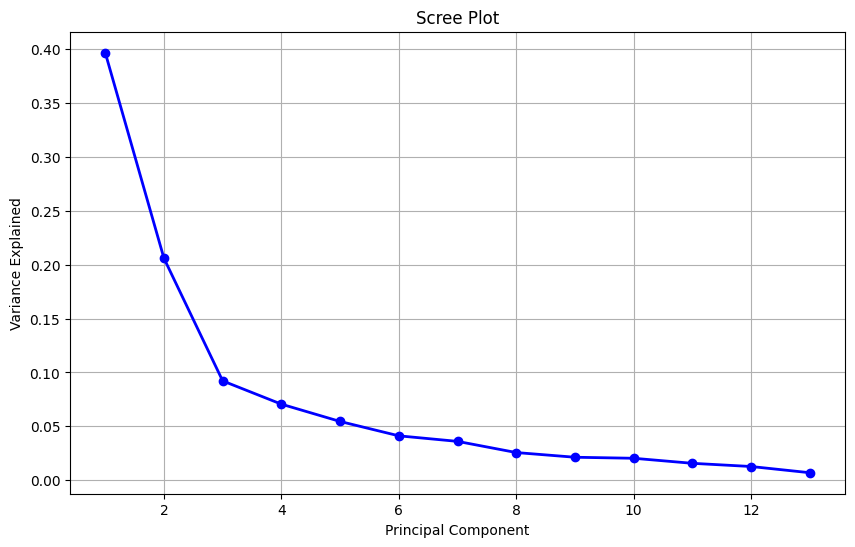

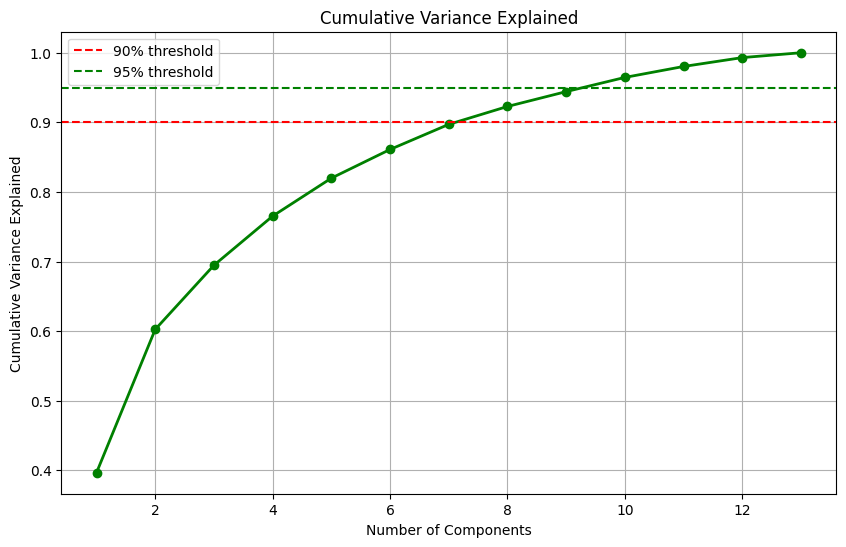

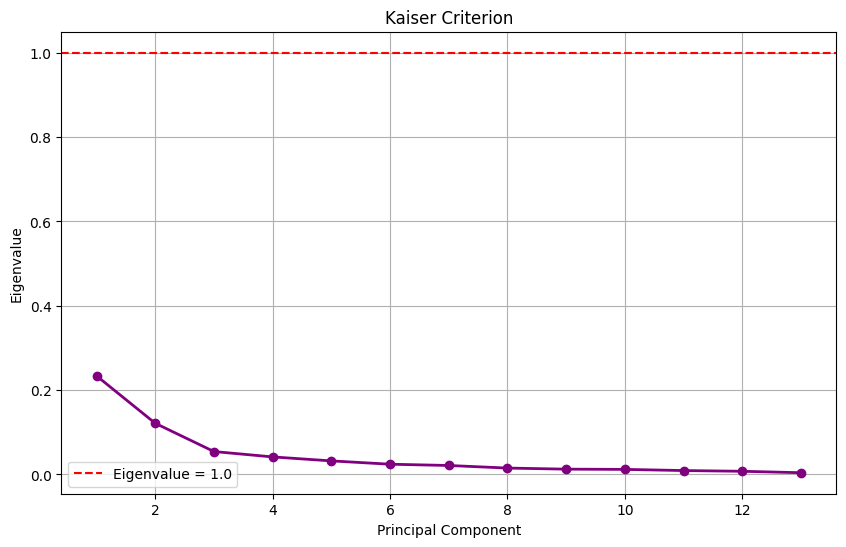

In [33]:
#visualizations for optimal # of components
# Create a scree plot
plt.figure(figsize=(10, 6))
scree_plot = plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
         'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Create a cumulative variance plot
plt.figure(figsize=(10, 6))
cum_var_plot = plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         'o-', linewidth=2, color='green')
# Add lines for 90% and 95% thresholds
plt.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

# Create a Kaiser criterion plot (eigenvalues > 1)
eigenvalues = pca.explained_variance_

plt.figure(figsize=(10, 6))
kaiser_plot = plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 
         'o-', linewidth=2, color='purple')
plt.axhline(y=1.0, color='r', linestyle='--', label='Eigenvalue = 1.0')
plt.title('Kaiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
pca_optimal = PCA(n_components=n_components_optimal)

# Transform the data
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

In [35]:
#grid search
param_grid = {
    'n_neighbors': range(1, 10),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
best_cv_accuracy = grid_search.best_score_
print(f"Best cross-validation accuracy: {best_cv_accuracy:.4f}")


Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validation accuracy: 0.9701


In [36]:
# Train the model with optimal parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_pca, y_train)

# Predict on test set
y_pred = best_knn.predict(X_test_pca)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")




Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.89      0.94        18
           2       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Test Accuracy: 0.9556


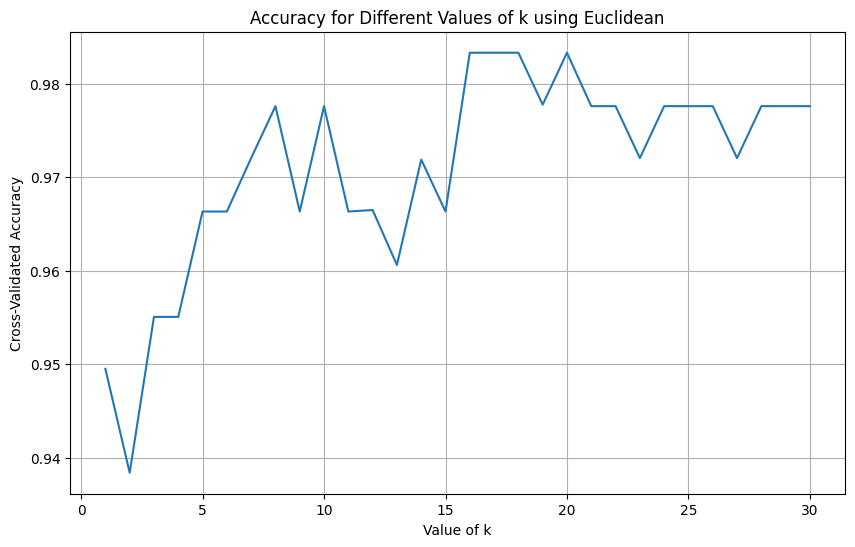

In [37]:
# Visualization of accuracy for different k values
X_scaled = scaler.transform(X)  # Scale the entire dataset
X_pca_optimal = pca_optimal.transform(X_scaled)  # Apply PCA

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_pca_optimal, wine_df['target'], cv=5)
    k_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of k')
plt.ylabel('Cross-Validated Accuracy')
plt.title(f'Accuracy for Different Values of k using Euclidean')
plt.grid(True)
plt.show()

In [38]:
# Initialize k-NN model with optimal parameters
knn_best = KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='uniform')
knn_best.fit(X_pca_optimal, wine_df['target'])

# Predict using the trained model
y_pred = knn_best.predict(X_pca_optimal)

# Evaluate the model
accuracy = accuracy_score(wine_df['target'], y_pred)
print(f"Training Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(wine_df['target'], y_pred))


Training Accuracy: 0.9831

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.96      0.98        71
           2       0.96      1.00      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.99      0.98       178
weighted avg       0.98      0.98      0.98       178



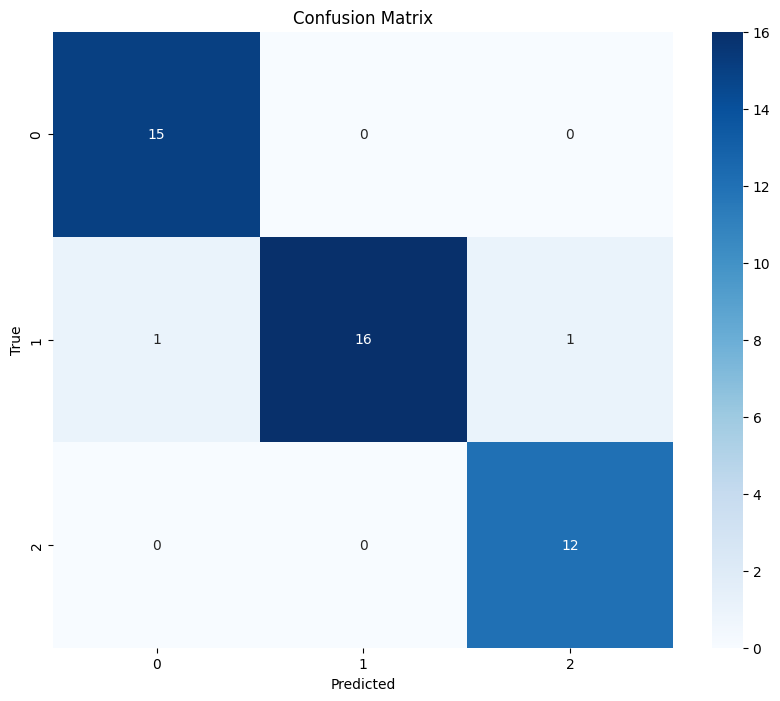

In [40]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Chick Weights Analysis

In [41]:
#Chick Basic Info
print(chicks_df.head())
print(chicks_df.info())
print(chicks_df.describe())
print(chicks_df.isnull().sum())

   weight       feed
0     179  horsebean
1     160  horsebean
2     136  horsebean
3     227  horsebean
4     217  horsebean
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   weight  71 non-null     int64 
 1   feed    71 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB
None
           weight
count   71.000000
mean   261.309859
std     78.073700
min    108.000000
25%    204.500000
50%    258.000000
75%    323.500000
max    423.000000
weight    0
feed      0
dtype: int64


In [42]:
#first few rows
chicks_df.head()

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean


/var/folders/hq/0d2ft2dx2xx1hw4vlltc8v7h0000gn/T/ipykernel_40888/2320722071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=chicks_df, x='feed', y='weight', palette='Set3')


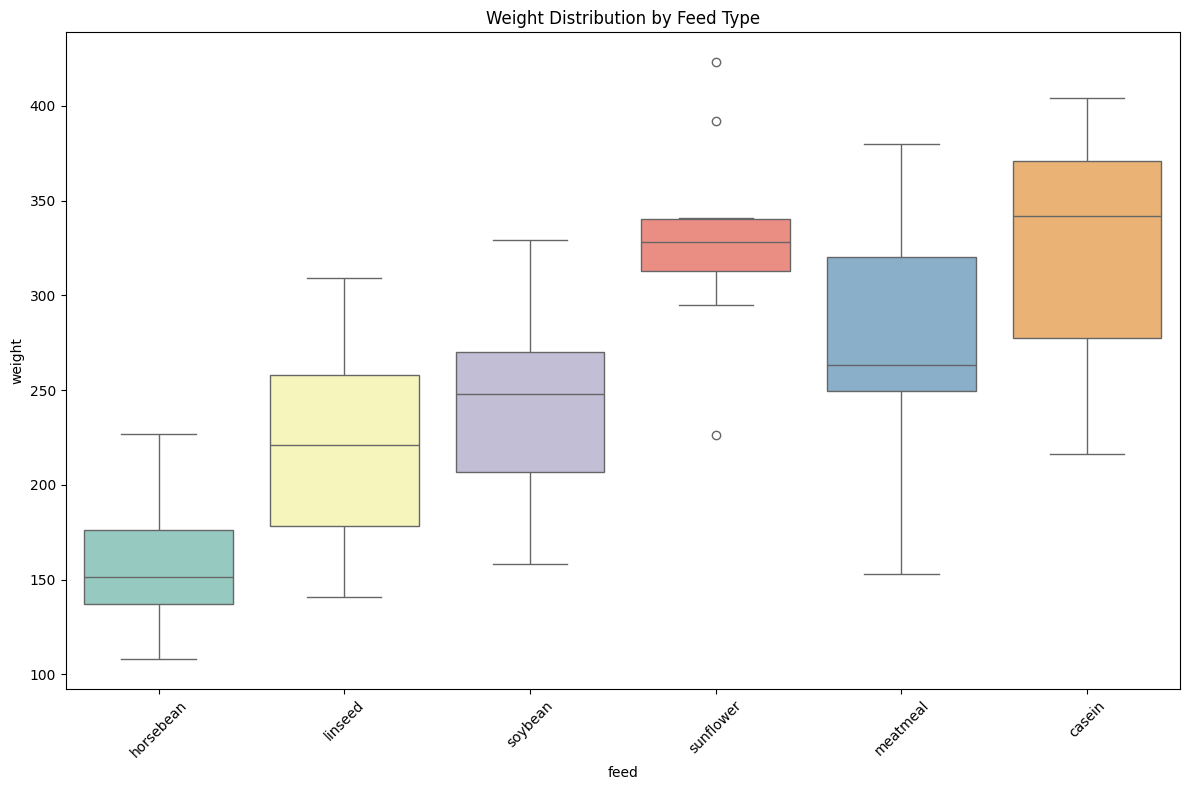

/var/folders/hq/0d2ft2dx2xx1hw4vlltc8v7h0000gn/T/ipykernel_40888/2320722071.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=chicks_df, x='feed', palette='Set3')


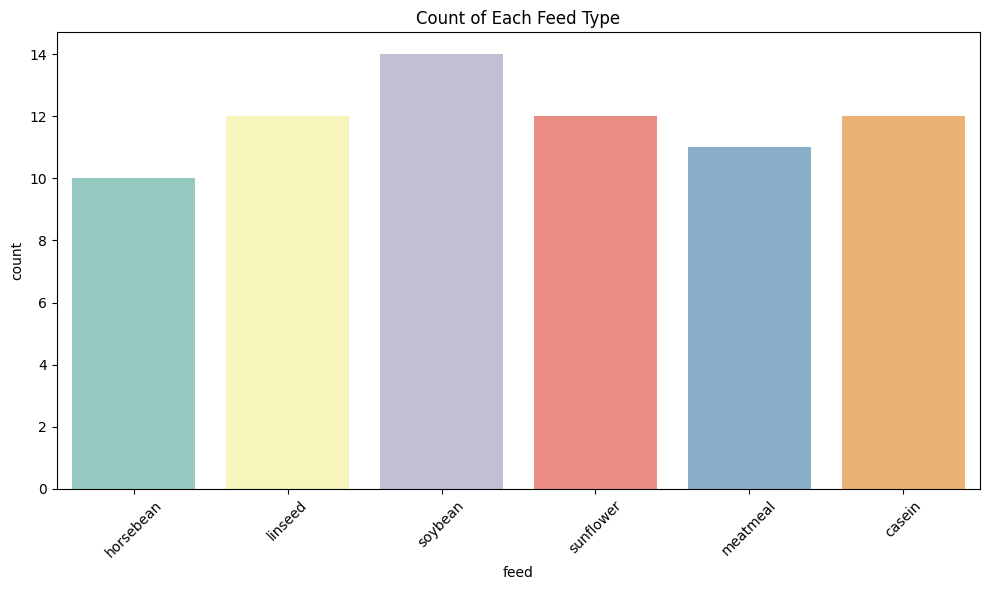

In [43]:
# Visualizing Weight Distribution by Feed Type
plt.figure(figsize=(12, 8))
sns.boxplot(data=chicks_df, x='feed', y='weight', palette='Set3')
plt.xticks(rotation=45)
plt.title('Weight Distribution by Feed Type')
plt.tight_layout()
plt.show()

#counts
plt.figure(figsize=(10, 6))
sns.countplot(data=chicks_df, x='feed', palette='Set3')
plt.xticks(rotation=45)
plt.title('Count of Each Feed Type')
plt.tight_layout()
plt.show()


In [44]:
#Standardize the weight feature for uniform scaling.
#scaler
scaler = StandardScaler() 

# Apply scaling to the 'weight' column
chicks_df['weight_scaled'] = scaler.fit_transform(chicks_df[['weight']])

# Display the first few rows to verify scaling
print(chicks_df.head())


   weight       feed  weight_scaled
0     179  horsebean      -1.061762
1     160  horsebean      -1.306854
2     136  horsebean      -1.616444
3     227  horsebean      -0.442583
4     217  horsebean      -0.571578


In [45]:
# PCA with 1 component
pca = PCA(n_components=1)

# Apply PCA transformation
chicks_df['weight_pca'] = pca.fit_transform(chicks_df[['weight_scaled']])

print(chicks_df[['feed', 'weight_scaled', 'weight_pca']].head())


        feed  weight_scaled  weight_pca
0  horsebean      -1.061762   -1.061762
1  horsebean      -1.306854   -1.306854
2  horsebean      -1.616444   -1.616444
3  horsebean      -0.442583   -0.442583
4  horsebean      -0.571578   -0.571578


In [ ]:
#had a lot of issues here... relied on ChatGpt to help me get through this. Originall my matrix was like this: 
#  [[ 1.  1.  1. ...  1. -1. -1.]
#  [ 1.  1.  1. ...  1. -1. -1.]
#  [ 1.  1.  1. ...  1. -1. -1.]
#  ...
#  [ 1.  1.  1. ...  1. -1. -1.]
#  [-1. -1. -1. ... -1.  1.  1.]
#  [-1. -1. -1. ... -1.  1.  1.]]

# I think I originally had 1 feature so I was getting this output (1.0 or -1.0)
# feed       casein  horsebean  linseed  meatmeal  soybean  sunflower
# feed                                                               
# casein        1.0       -1.0     -1.0       1.0     -1.0        1.0
# horsebean    -1.0        1.0      1.0      -1.0      1.0       -1.0
# linseed      -1.0        1.0      1.0      -1.0      1.0       -1.0
# meatmeal      1.0       -1.0     -1.0       1.0     -1.0        1.0
# soybean      -1.0        1.0      1.0      -1.0      1.0       -1.0
# sunflower     1.0       -1.0     -1.0       1.0     -1.0        1.0

# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
chicks_df['weight_minmax'] = scaler_minmax.fit_transform(chicks_df[['weight']])

# Apply StandardScaler
scaler_standard = StandardScaler()
chicks_df['weight_standard'] = scaler_standard.fit_transform(chicks_df[['weight']])

# Group by feed
feed_features = chicks_df.groupby('feed')[['weight_minmax', 'weight_standard']].mean().reset_index() #using both features

# Create the feature matrix using both scaled features
feature_matrix = feed_features[['weight_minmax', 'weight_standard']].values

# Calculate cosine similarity
similarity_matrix = cosine_similarity(feature_matrix)

# Convert to DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix, index=feed_features['feed'], columns=feed_features['feed'])

print(similarity_df)


feed         casein  horsebean   linseed  meatmeal   soybean  sunflower
feed                                                                   
casein     1.000000  -0.673386 -0.291270  0.874615  0.289592   0.999598
horsebean -0.673386   1.000000  0.903373 -0.230531  0.512605  -0.694076
linseed   -0.291270   0.903373  1.000000  0.209049  0.831299  -0.318275
meatmeal   0.874615  -0.230531  0.209049  1.000000  0.717326   0.860518
soybean    0.289592   0.512605  0.831299  0.717326  1.000000   0.262339
sunflower  0.999598  -0.694076 -0.318275  0.860518  0.262339   1.000000


In [48]:
#create function for similarities
def recommend_similar_feeds(feed_name, n=2):

    # Find the feed index
    try:
        feed_idx = feed_features[feed_features['feed'] == feed_name].index[0]
    except IndexError:
        print(f"Feed '{feed_name}' not found in the dataset.")
        return
    
    # Get similarity scores for this feed
    feed_similarities = similarity_matrix[feed_idx]
    
    # Sort feeds by similarity (excluding itself)
    similar_indices = np.argsort(feed_similarities)[::-1][1:n+1]
    
    # Get the similar feeds and their scores
    similar_feeds = feed_features.iloc[similar_indices][['feed']]
    similar_scores = feed_similarities[similar_indices]
    
    # Construct the DataFrame
    result_df = pd.DataFrame({
        'Feed': similar_feeds['feed'].values,
        'Similarity Score': similar_scores
    })
    
    return result_df

# Example usage:
print(recommend_similar_feeds('soybean', n=3))
print(recommend_similar_feeds('linseed', n=3))
print(recommend_similar_feeds('horsebean', n=3))
print(recommend_similar_feeds('sunflower', n=3))
print(recommend_similar_feeds('casein', n=3))
print(recommend_similar_feeds('meatmeal', n=3))


        Feed  Similarity Score
0    linseed          0.831299
1   meatmeal          0.717326
2  horsebean          0.512605
        Feed  Similarity Score
0  horsebean          0.903373
1    soybean          0.831299
2   meatmeal          0.209049
       Feed  Similarity Score
0   linseed          0.903373
1   soybean          0.512605
2  meatmeal         -0.230531
       Feed  Similarity Score
0    casein          0.999598
1  meatmeal          0.860518
2   soybean          0.262339
        Feed  Similarity Score
0  sunflower          0.999598
1   meatmeal          0.874615
2    soybean          0.289592
        Feed  Similarity Score
0     casein          0.874615
1  sunflower          0.860518
2    soybean          0.717326


Summary of Recommendations:

Soybean:

The most similar feed to Soybean is Linseed with a similarity score of 0.831. This high similarity neabs that Linseed could serve as a alternative to Soybean.

Linseed:

The top recommendation for Linseed is Horsebean with a similarity score of 0.903. This suggests that Horsebean is the most comparable.

Horsebean:

Linseed is the closest match for Horsebean with a similarity score of 0.903.

Sunflower:

The most similar feed to Sunflower is Casein with a near-perfect similarity score of 0.999! As such that would be my replacement recommendation.

Casein:

Sunflower is the most similar feed to Casein with a similarity score of 0.999 (!), suggesting almost identical weight profiles

Meatmeal:

Casein (0.874) and Sunflower (0.860) are highly similar to Meatmeal, which means that these feeds types serve as substitutes for Meatmeal.

Arrests Analysis

In [49]:
#Arrests Basic Info
print(arrests_df.head())
print(arrests_df.info())
print(arrests_df.describe())
print(arrests_df.isnull().sum())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07

In [50]:
arrests_df.rename(columns={'Unnamed: 0': 'State'})

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


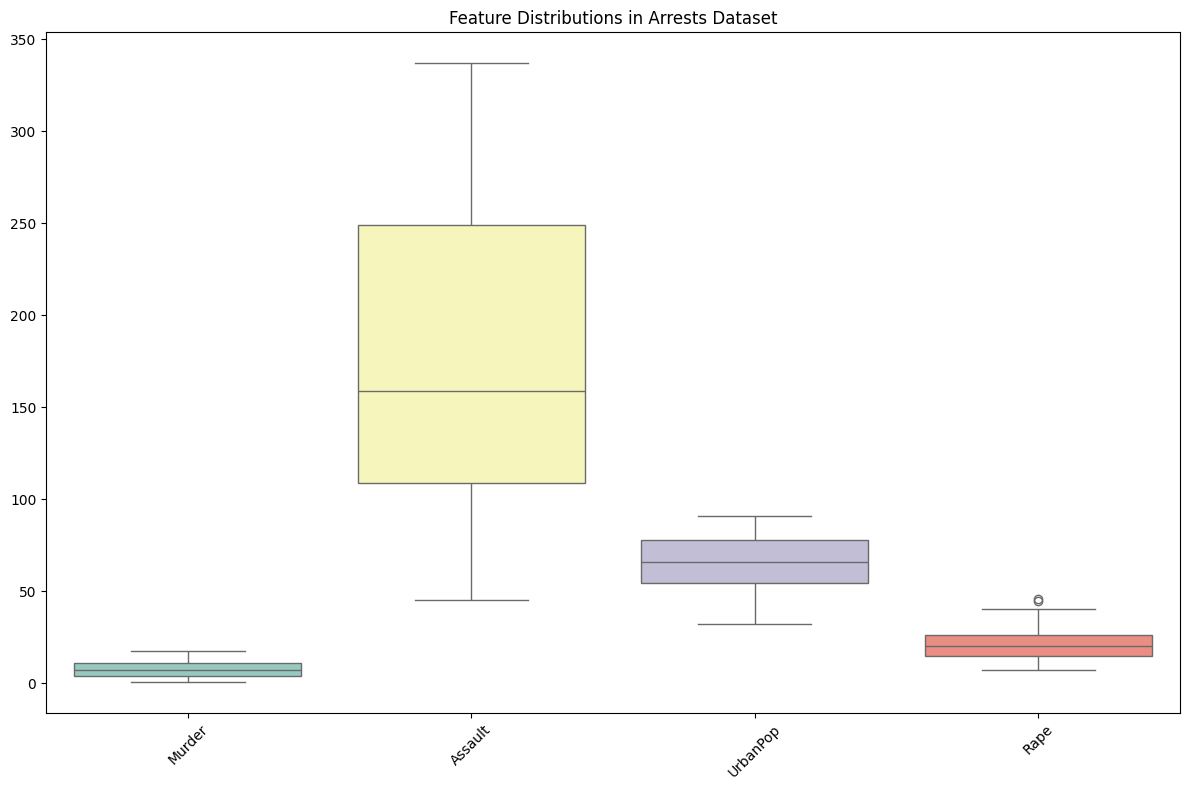

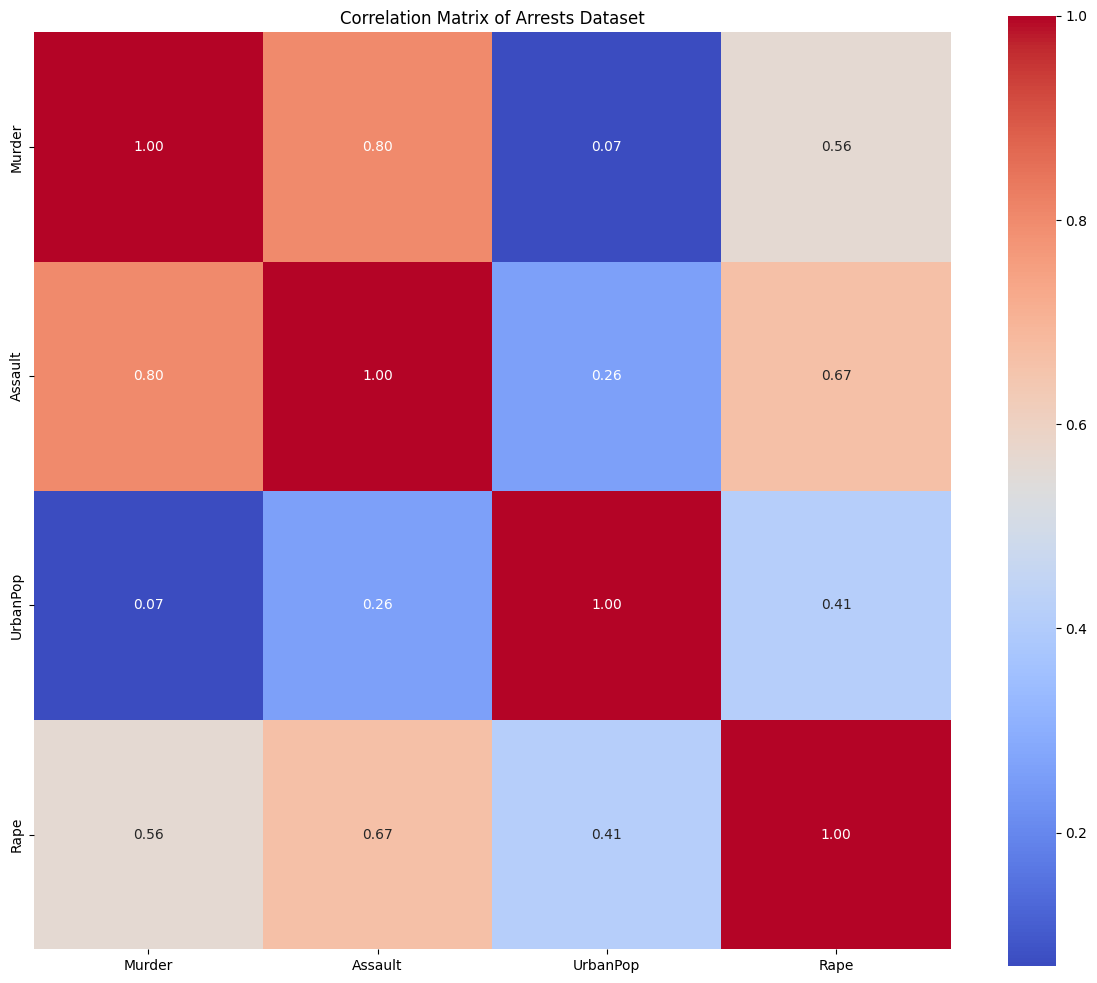

In [51]:
# Visualize distributions using boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=arrests_df, palette='Set3')
plt.xticks(rotation=45)
plt.title('Feature Distributions in Arrests Dataset')
plt.tight_layout()
plt.show()

# states = arrests_df['State'] did not need
numeric_columns = ['Murder', 'Assault', 'UrbanPop', 'Rape']

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(arrests_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Arrests Dataset')
plt.tight_layout()
plt.show()

In [52]:
# Remove labels (unsupervised learning)... not sure if necessary
# df_unlabeled = arrests_df.copy()

# Rescale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(arrests_df[numeric_columns])

df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)

# Check the first few rows to confirm scaling
print(df_scaled.head())

# Shape
df_scaled.shape 

     Murder   Assault  UrbanPop      Rape
0  1.255179  0.790787 -0.526195 -0.003451
1  0.513019  1.118060 -1.224067  2.509424
2  0.072361  1.493817  1.009122  1.053466
3  0.234708  0.233212 -1.084492 -0.186794
4  0.281093  1.275635  1.776781  2.088814


(50, 4)

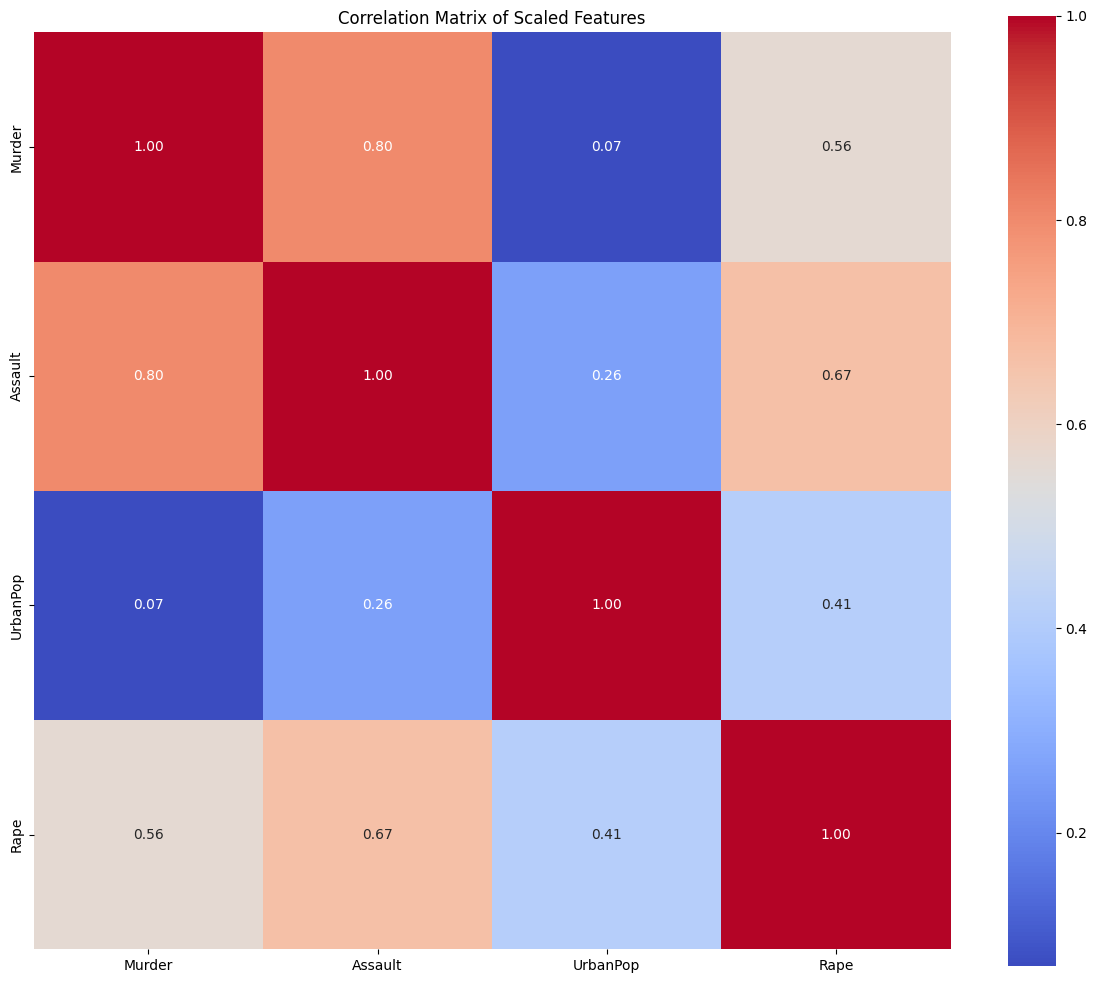

In [53]:
#correlation matrix for top 3 features

plt.figure(figsize=(12, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Scaled Features')
plt.tight_layout()
plt.show()

#murder, assault, rape


In [54]:
top_features = ['Murder', 'Assault', 'Rape']

df_selected = df_scaled[top_features]

df_selected.head()

,Murder,Assault,Rape
0,1.255179,0.790787,-0.003451
1,0.513019,1.118060,2.509424
2,0.072361,1.493817,1.053466
3,0.234708,0.233212,-0.186794
4,0.281093,1.275635,2.088814


In [55]:
#Apply PCA to reduce the dataset to 2 principal components.
# PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected)

/opt/anaconda3/envs/mac_intel.c0c1/lib/python3.12/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


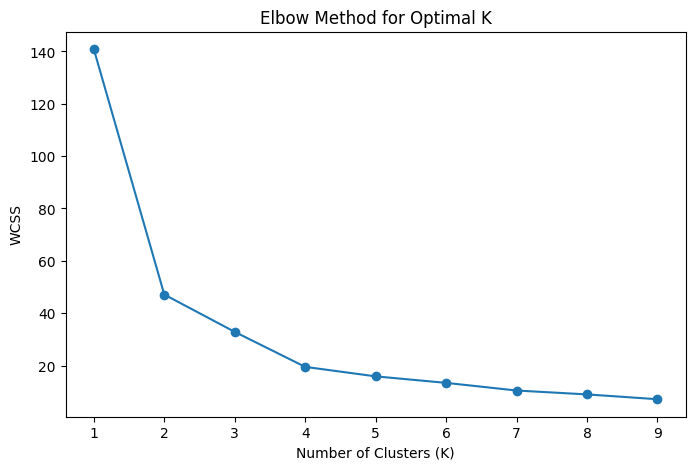

In [56]:
# Determine the optimal number of clusters:
# Use the elbow method (inertia) for K-Means.
# WCSS

wcss = []

# for loop
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

#plot elbow
# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

#optimal k is 2

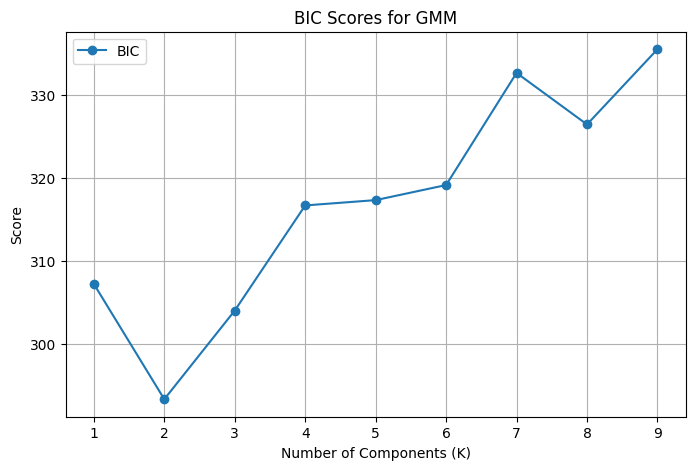

In [57]:
# Use Bayesian Information Criterion (BIC) for GMM.
#Bic for k
bic_scores = []
k_values = range(1, 10)

# for loop
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    gmm.fit(df_pca)
    bic_scores.append(gmm.bic(df_pca))
  
#plot BIC
plt.figure(figsize=(8, 5))
plt.plot(k_values, bic_scores, marker='o', linestyle='-', label='BIC')
plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.legend()
plt.title('BIC Scores for GMM')
plt.grid(True)
plt.show()

#k appears to be 2

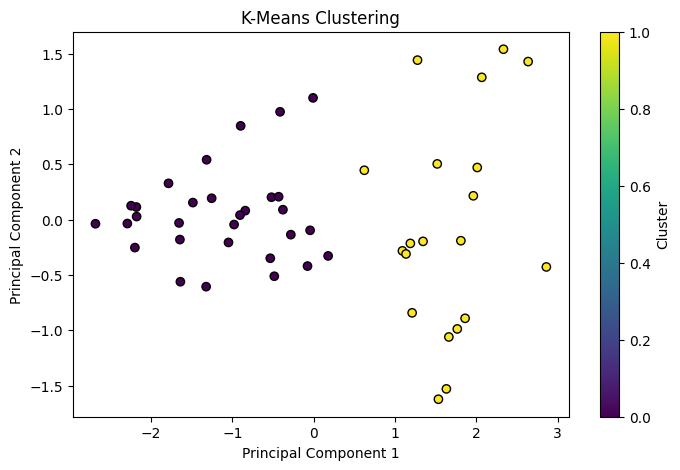

In [58]:
#plot kmeans
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_pca)

# Plot K-Means Clustering
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering")
plt.colorbar(label="Cluster")
plt.show()


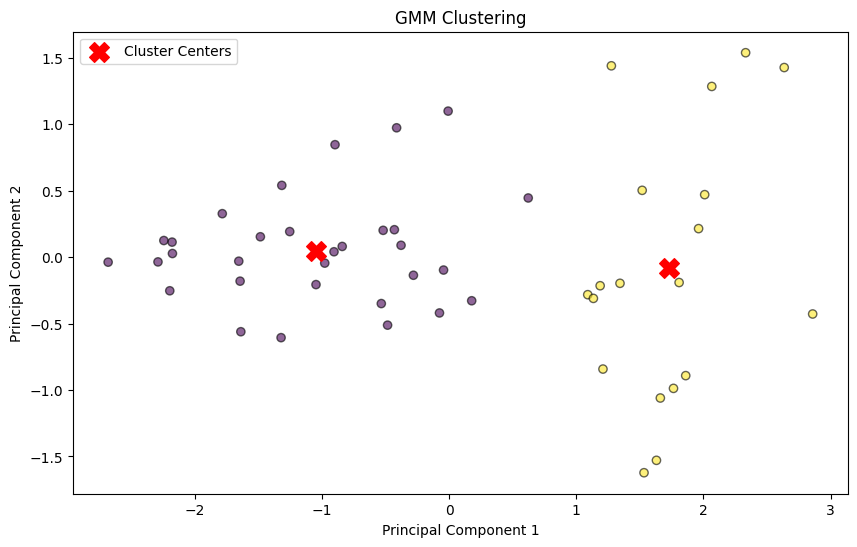

In [59]:
# Apply GMM to the PCA-transformed data
optimal_k = 2
gmm = GaussianMixture(n_components=optimal_k, random_state=42, n_init=10)
gmm_labels = gmm.fit_predict(df_pca)

# Scatter plot of data points with GMM labels
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.6)

# Plot GMM cluster centers in PCA space
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=200, c='red', marker='X', label="Cluster Centers")

plt.title('GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()
